<a href="https://colab.research.google.com/github/GauravRana24/Walmart_CLT_CI_Pyhton_project/blob/main/Walmart_Confidence_Interval_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,ttest_ind


# **Import the dataset and do usual data analysis steps**


In [ ]:
#Loading data set
data=pd.read_csv("walmart_data.csv")

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
# check data shape
data.shape

(550068, 10)

In [ ]:
# check data type of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
# descriptive stats
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,550068.0,NaN,NaN,NaN,1003028.842401,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068.0,NaN,NaN,NaN,8.076707,6.52266,0.0,2.0,7.0,14.0,20.0
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,550068.0,NaN,NaN,NaN,0.409653,0.49177,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,NaN,NaN,NaN,5.40427,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,NaN,NaN,NaN,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [ ]:
data["Marital_Status"].value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64


Marital_Status has integer value
Lets change the Marital_Status columns values into "Married" and "Unmarried"

In [ ]:
data["Marital_Status"]=data["Marital_Status"].replace([0,1],["Unmarried","Married"])
data["Marital_Status"].value_counts()

Marital_Status
Unmarried    324731
Married      225337
Name: count, dtype: int64

In [ ]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

# **Non-Graphical analysis**

## **Gender analysis**

In [ ]:
data["Gender"].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

In [ ]:
# length of total data
len(data)

550068

In [ ]:
# len of male data
len(data[data["Gender"]=="M"])

414259

In [ ]:
# percenatge of male
len(data[data["Gender"]=="M"])/len(data)*100

75.31050706458112

In [ ]:
# len of female data
len(data[data["Gender"]=="F"])

135809

In [ ]:
# percenatge of female
len(data[data["Gender"]=="F"])/len(data)*100

24.689492935418894

75% are male and 25% are female

## **AGE analysis**

In [ ]:
data["Age"].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [ ]:
# create separate data fro diff age group
len_26_35=data[data["Age"]=="26-35"]
len_36_45=data[data["Age"]=="36-45"]
len_26_45=(len(len_26_35))+(len(len_36_45))

In [ ]:
# percentage of top 2 age group
len_26_45/len(data)*100

59.91986445312216

In [ ]:
# percentage of top age group
len(len_26_35)/len(data)*100

39.91997353054531

**60% of data are from age 26 to 45 out of them 40% are from 26 to 35 age group**

## **occupation analysis**

In [ ]:
data["Occupation"].value_counts()

Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64

In [ ]:
# check percnetage of occupation
len(data[data["Occupation"]<=7])/len(data)*100

59.13359802788018

60% of data has occupation less than 7

## **city category analysis**

In [ ]:
data["City_Category"].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [ ]:
total=len(data)
total

550068

In [ ]:
# CREATE SEPARATE DATA FOR EVERY CITYCATEGORY
data_B=data[data["City_Category"]=="B"]
data_C=data[data["City_Category"]=="C"]
data_A=data[data["City_Category"]=="A"]

In [ ]:
# perc of b city category
len(data_B)/total*100

42.026258571667505

In [ ]:
# perc of b city category
len(data_C)/total*100

31.11887984758248

In [ ]:
# perc of b city category
len(data_A)/total*100

26.85486158075002

**B city category has highest percentage of share in data 42%**

## **Stay_In_Current_City_Years analysis**

In [ ]:
data["Stay_In_Current_City_Years"].value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

In [ ]:
data_1=data[data["Stay_In_Current_City_Years"]=="1"]
data_2=data[data["Stay_In_Current_City_Years"]=="2"]
data_1_2=(len(data_1)) + (len(data_2))

In [ ]:
# len of stay in  current city for 1
len(data_1)

193821

In [ ]:
# len of stay in  current city for 2
len(data_2)

101838

In [ ]:
# len of stay in  current city for 1 & 2
data_1_2

295659

In [ ]:
data_1_2/total*100

53.74953642095159

**53% of people stay in city for 1 or 2 years**

## **Marital_Status analysis**

In [ ]:
data["Marital_Status"].value_counts()

Marital_Status
Unmarried    324731
Married      225337
Name: count, dtype: int64

In [ ]:
# create data for separate marital status
data_unm=data[data["Marital_Status"]=="Unmarried"]
data_mar=data[data["Marital_Status"]=="Married"]

In [ ]:
# percentage of unmarried
len(data_unm)/total*100

59.0347011642197

In [ ]:
# percentage of married
len(data_mar)/total*100

40.9652988357803

**60% are unmarried and 40% are married**

## **Product_Category analysis**

In [ ]:
data["Product_Category"].value_counts()

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

In [ ]:
data_5=data[data["Product_Category"]==5]
data_1=data[data["Product_Category"]==1]
data_8=data[data["Product_Category"]==8]
data_1_5_8=len(data_5)+len(data_1)+len(data_8)

In [ ]:
data_1_5_8/total*100

73.67016441603583

**Most frequent purchased product category are of 5, 1, and 8 , 74% of product are purchased from these 3 categories**

In [ ]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

## **finding from non-graphical analysis**


75% are male and 25% are female in this data


60% of people are from 26 to 45 age group out of them 40% are from 26 to 35 age
group which represent the youth


60% of people has occupation less than 7


B city category has highest percentage of share in data 42%


53% of people stay in city for 1 or 2 years


60% are unmarried and 40% are married in this data


Most frequent purchased product category are of 5, 1, and 8 , 74% of product are purchased from these 3 categories




# **checking null and duplicates**

In [ ]:
# check null
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**no null values are present in this dataset**

In [ ]:
# check duplicates
data[data.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


**no duplicate values in this data**

# **Visual Analysis Univariate and Bivariate**

## **Visual Univariate Analysis**

In [ ]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

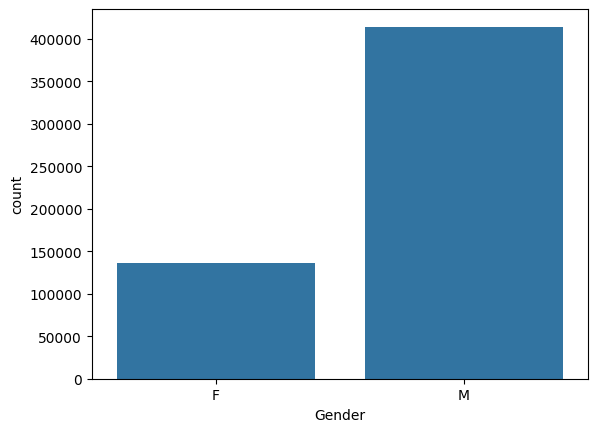

In [ ]:
#Gender
sns.countplot(data,x="Gender")
plt.show()

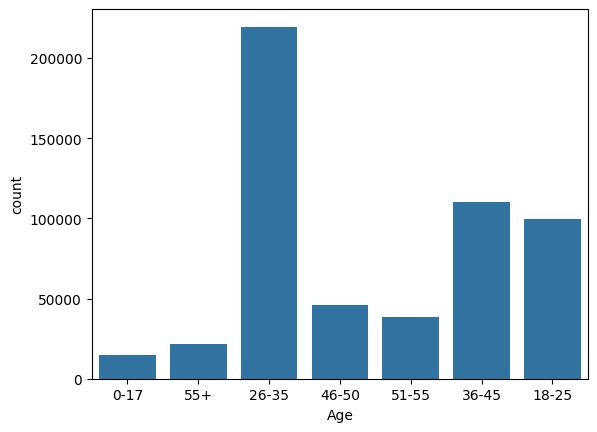

In [ ]:
#Age
sns.countplot(data,x="Age")
plt.show()

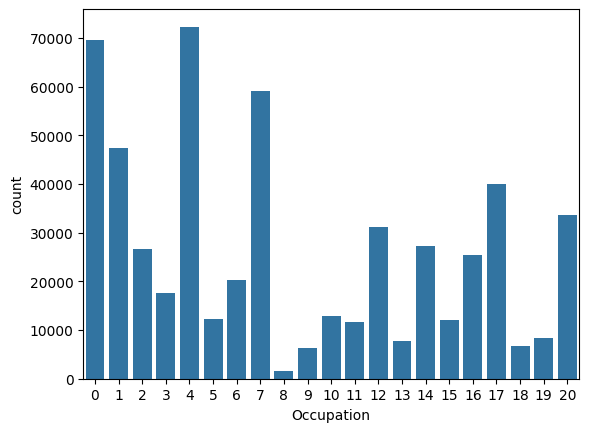

In [ ]:
#Occupation
sns.countplot(data,x="Occupation")
plt.show()

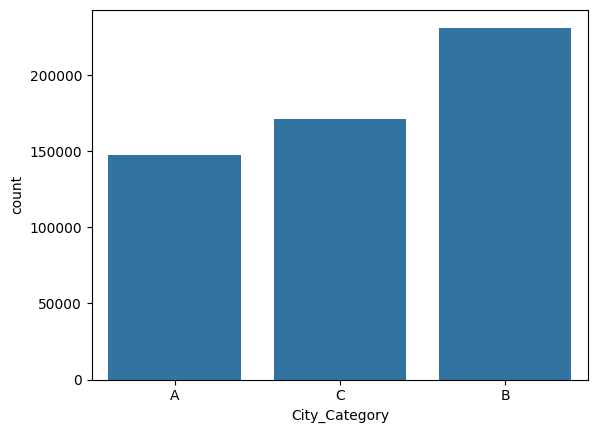

In [ ]:
#City_Category
sns.countplot(data,x="City_Category")
plt.show()

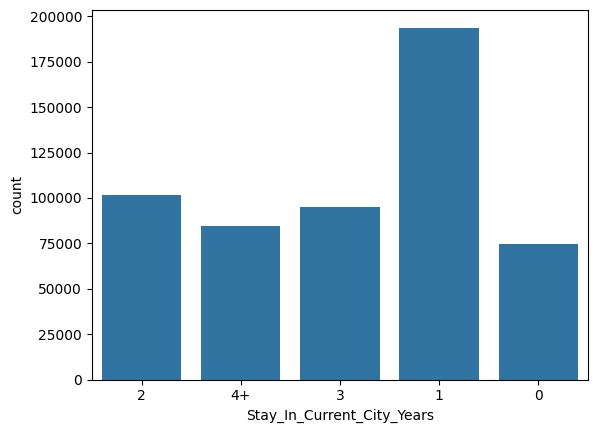

In [ ]:
#Stay_In_Current_City_Years
sns.countplot(data,x="Stay_In_Current_City_Years")
plt.show()

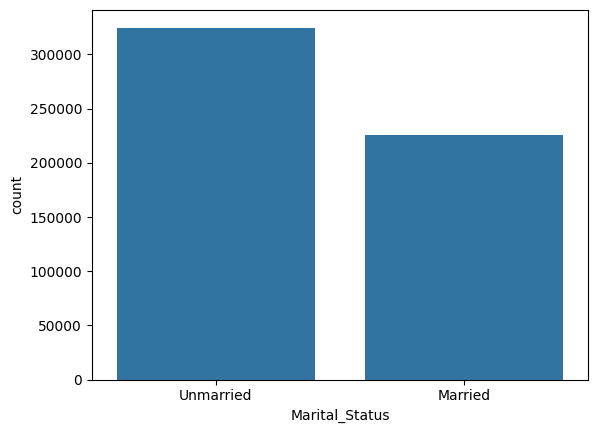

In [ ]:
#Marital_Status
sns.countplot(data,x="Marital_Status")
plt.show()

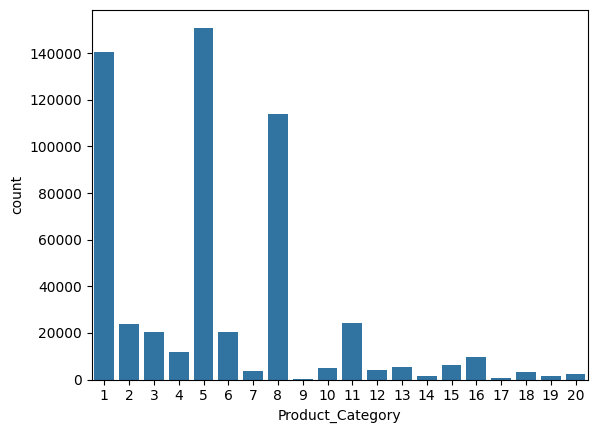

In [ ]:
sns.countplot(data,x="Product_Category")
plt.show()

<Axes: xlabel='Purchase'>

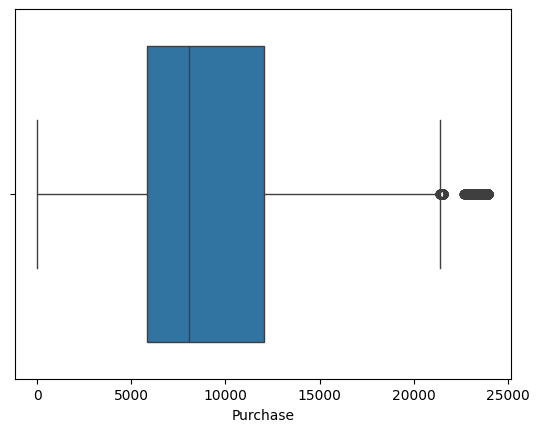

In [ ]:
#Purchase
sns.boxplot(data,x="Purchase")

## Visual bivariate analysis

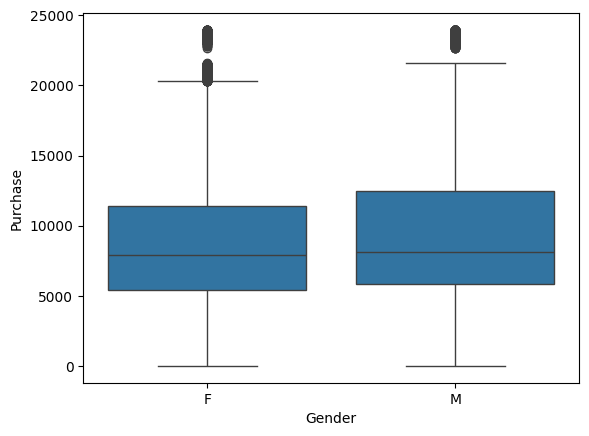

In [ ]:
# gender vs purchase
sns.boxplot(data,x="Gender",y="Purchase")
plt.show()

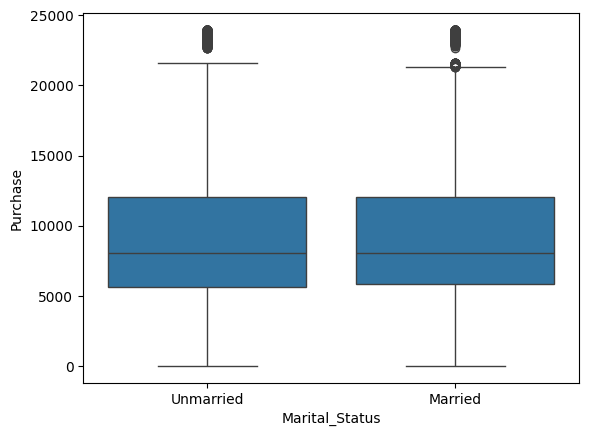

In [ ]:
# marital status vs purchase
sns.boxplot(data,x="Marital_Status",y="Purchase")
plt.show()

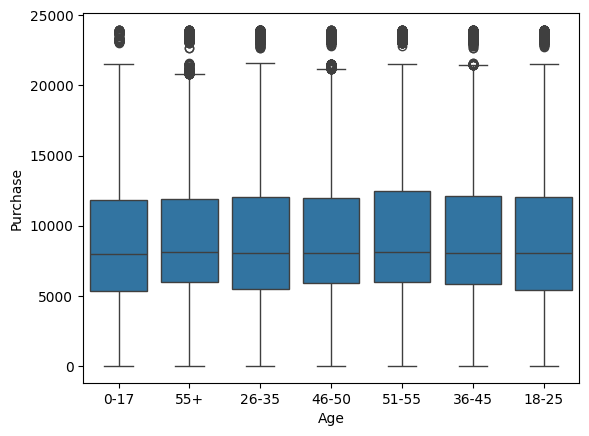

In [ ]:
# age vs purchase
sns.boxplot(data,x="Age",y="Purchase")
plt.show()

**Medians of the box plot are nearly same for purchase vs Gender and purchase vs Marital status vs age**

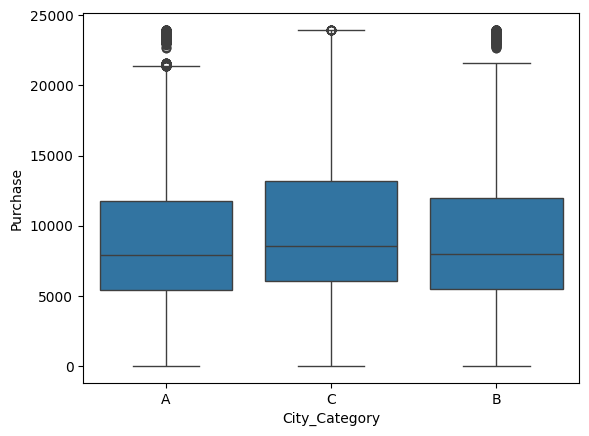

In [ ]:
# category vs purchase
sns.boxplot(data,x="City_Category",y="Purchase")
plt.show()

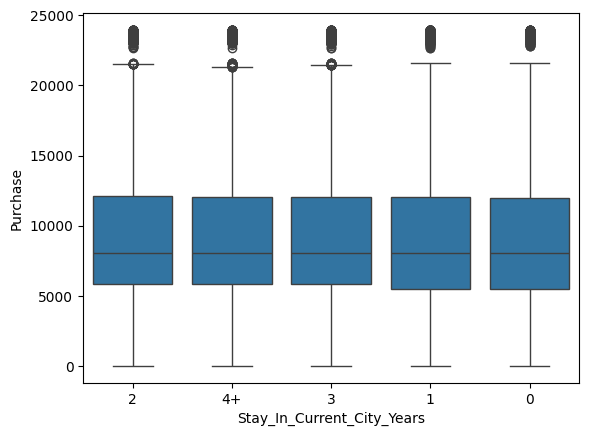

In [ ]:
# category vs purchase
sns.boxplot(data,x="Stay_In_Current_City_Years",y="Purchase")
plt.show()

**check data distribution**

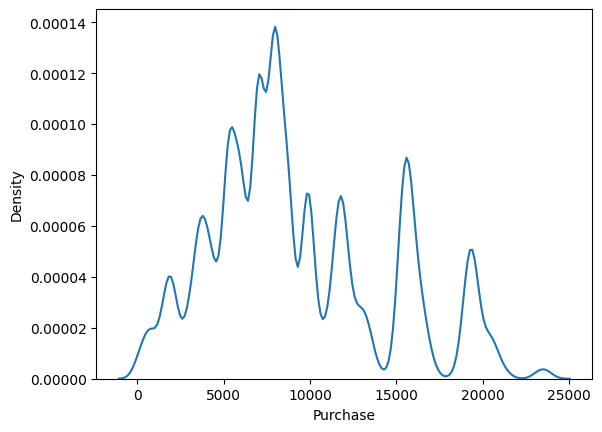

In [ ]:
sns.kdeplot(data,x="Purchase")
plt.show()

**purchase not follow normal distribution**

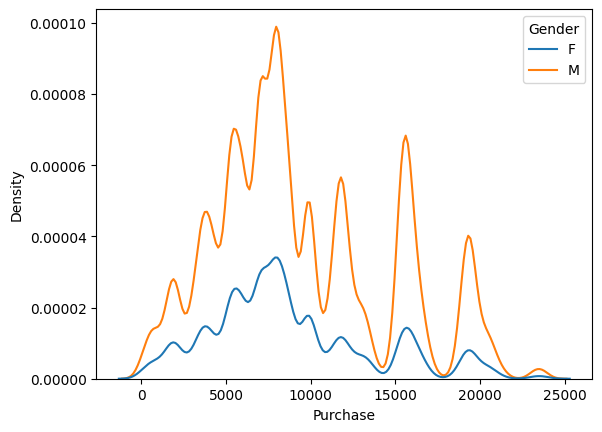

In [ ]:
sns.kdeplot(data,x="Purchase",hue="Gender")
plt.show()

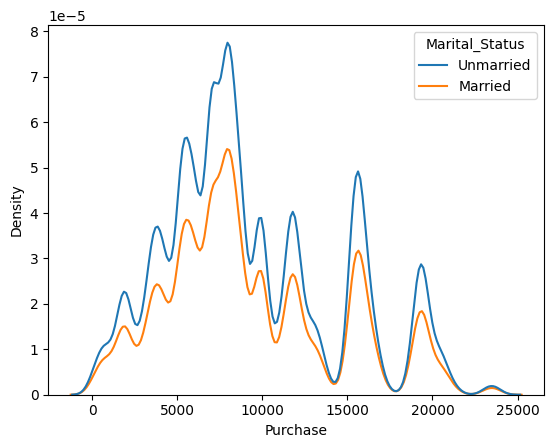

In [ ]:
sns.kdeplot(data,x="Purchase",hue="Marital_Status")
plt.show()

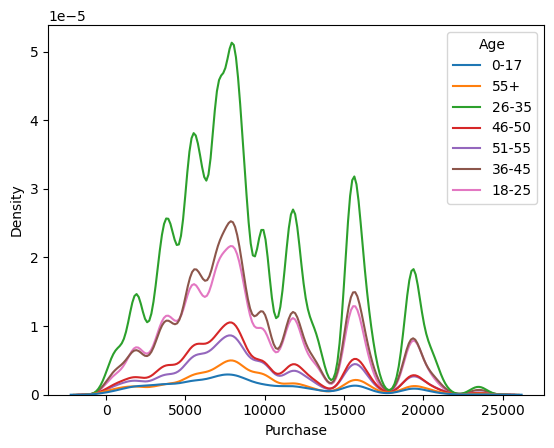

In [ ]:
sns.kdeplot(data,x="Purchase",hue="Age")
plt.show()

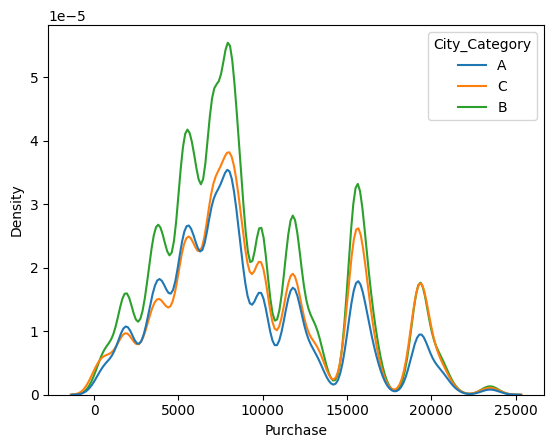

In [ ]:
sns.kdeplot(data,x="Purchase",hue="City_Category")
plt.show()

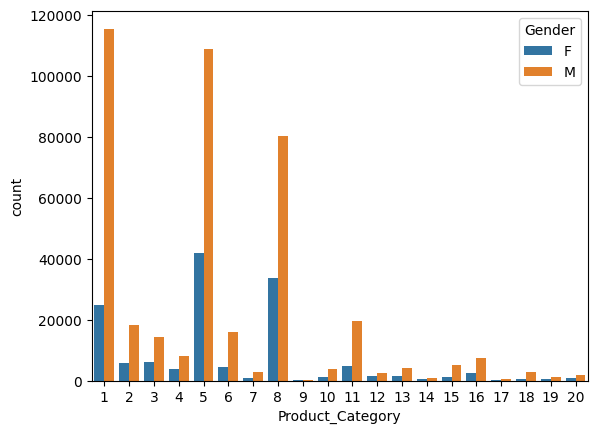

In [ ]:
sns.countplot(data,x="Product_Category",hue="Gender")
plt.show()

**male are puchasing more in all product category**

In [ ]:
# len of only men data
len(data[data["Gender"]=="M"])

414259

In [ ]:
# category wise count
data_m=data[data["Gender"]=="M"]
data_m["Product_Category"].value_counts(ascending=False)

Product_Category
1     115547
5     108972
8      80367
11     19548
2      18206
6      15907
3      14207
4       8114
16      7426
15      5244
13      4087
10      3963
7       2778
18      2743
12      2415
20      1827
19      1152
14       900
17       516
9        340
Name: count, dtype: int64

In [ ]:
# sum of top category for men
data_1=data_m[data_m["Product_Category"]==1]
data_5=data_m[data_m["Product_Category"]==5]
data_8=data_m[data_m["Product_Category"]==8]
men_data=len(data_1)+len(data_5)+len(data_8)
men_data

304886

In [ ]:
# percenatge of top categroy for men
men_data/len(data[data["Gender"]=="M"])*100

73.59791821058806

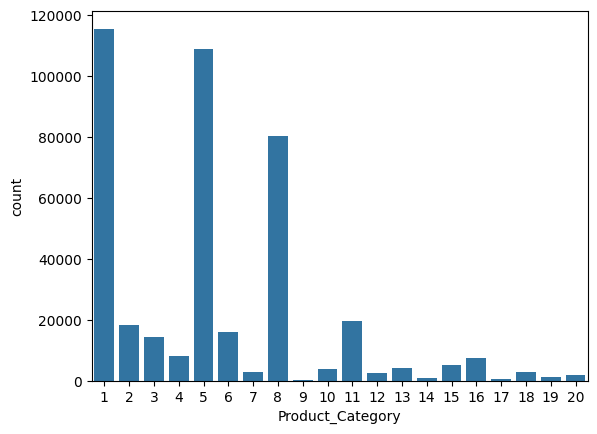

In [ ]:
sns.countplot(data_m,x="Product_Category")
plt.show()

**74% sale of male is from product 1,5,8**

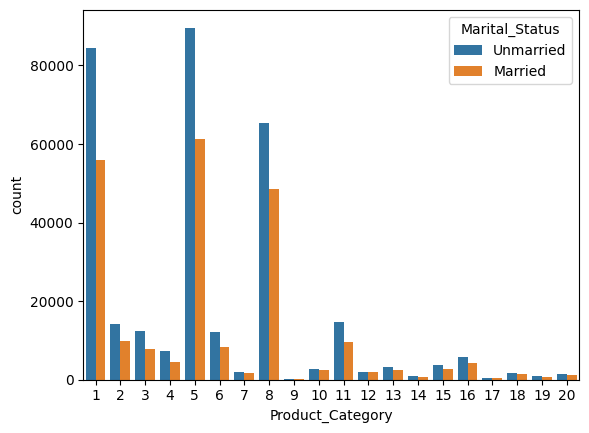

In [ ]:
sns.countplot(data,x="Product_Category",hue="Marital_Status")
plt.show()

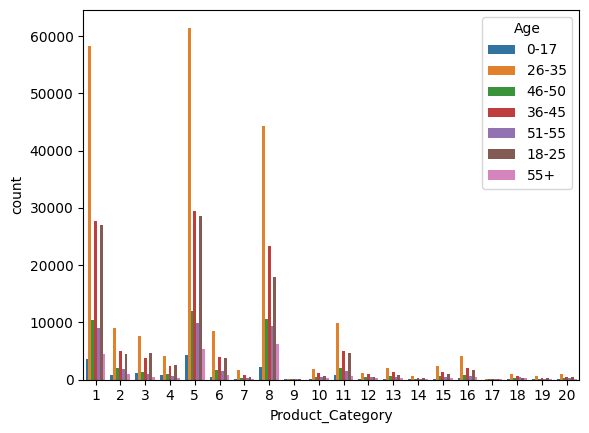

In [ ]:
sns.countplot(data,x="Product_Category",hue="Age")
plt.show()

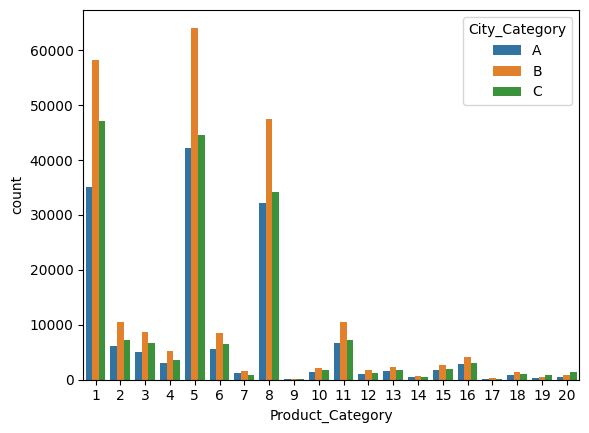

In [ ]:
sns.countplot(data,x="Product_Category",hue="City_Category")
plt.show()

## **MUltivariate anlysis**

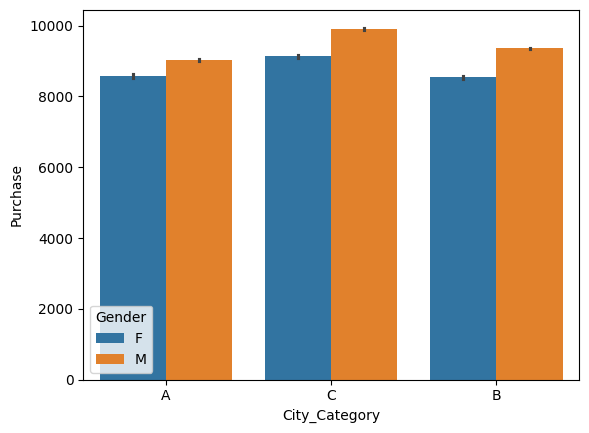

In [ ]:
sns.barplot(data,x="City_Category",y="Purchase",hue="Gender")
plt.show()

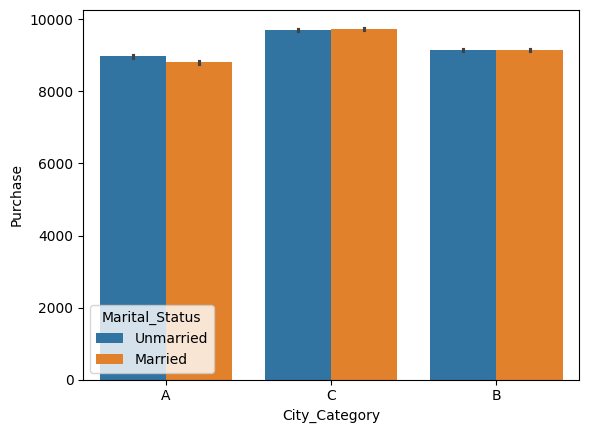

In [ ]:
sns.barplot(data,x="City_Category",y="Purchase",hue="Marital_Status")
plt.show()

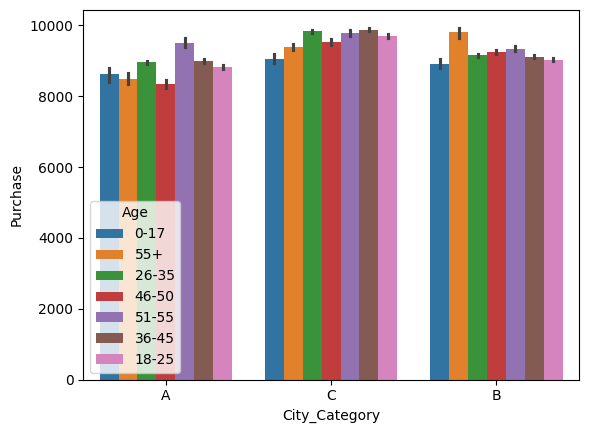

In [ ]:
sns.barplot(data,x="City_Category",y="Purchase",hue="Age")
plt.show()

<Axes: xlabel='Age', ylabel='Purchase'>

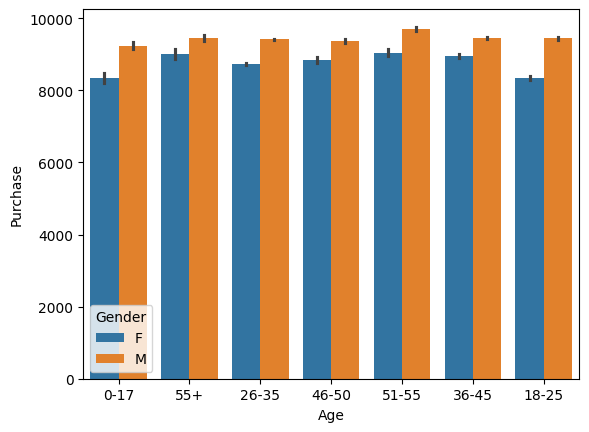

In [ ]:
sns.barplot(data,x="Age",y="Purchase",hue="Gender")

<Axes: xlabel='Age', ylabel='Purchase'>

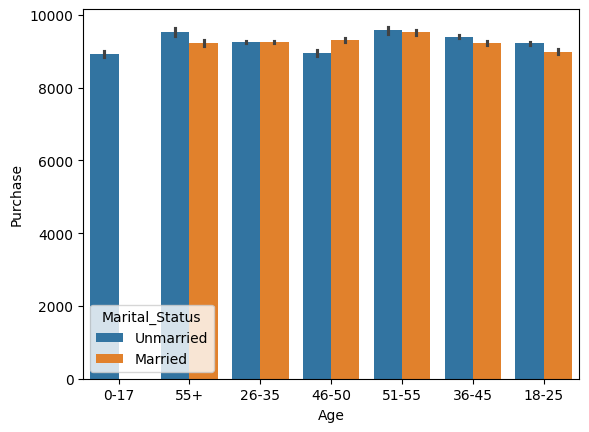

In [ ]:
sns.barplot(data,x="Age",y="Purchase",hue="Marital_Status")

<Axes: xlabel='Age', ylabel='Purchase'>

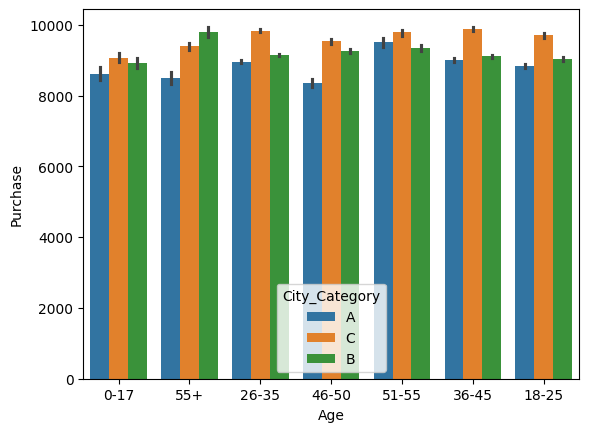

In [ ]:
sns.barplot(data,x="Age",y="Purchase",hue="City_Category")

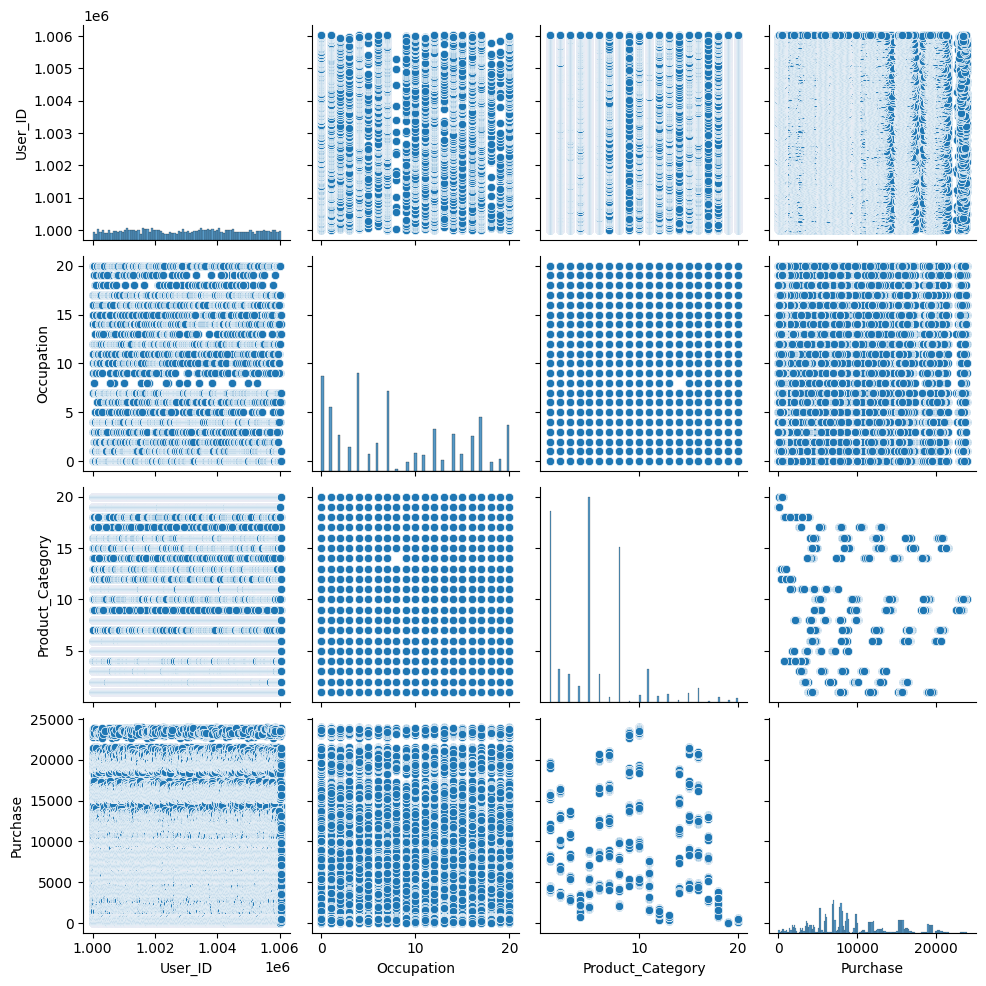

In [ ]:
sns.pairplot(data)

# CLT USE FOR PURCHASE AS PURCHASE DOESNOT FOLLOW GAUSSIAN

### **PURCHASE VS GENDER**

FOR 500 SAMPLE

In [ ]:
female=pd.Series(data.loc[data["Gender"]=="F"]["Purchase"])
male=pd.Series(data.loc[data["Gender"]=="M"]["Purchase"])

In [ ]:
np.mean(female)

8734.565765155476

In [ ]:
np.mean(male)

9437.526040472265

<Axes: ylabel='Count'>

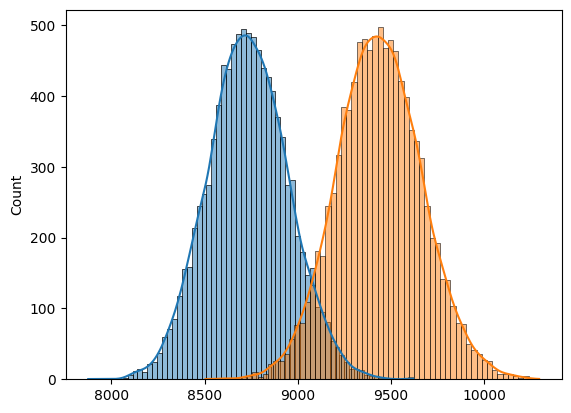

In [ ]:
female_clt=[]
fem_samp_500=np.random.choice(female,size=500)
for i in range(10000):
    female_clt.append(np.mean(np.random.choice(female,size=500)))
male_clt=[]
m_samp_500=np.random.choice(male,size=500)
for i in range(10000):
    male_clt.append(np.mean(np.random.choice(male,size=500)))
sns.histplot(female_clt,kde=True)
sns.histplot(male_clt,kde=True)

In [ ]:
upperlimit_males= np.mean(m_samp_500) - norm.ppf(0.025) * np.std(m_samp_500)/(np.sqrt(500))
lowerlimit_males= np.mean(m_samp_500) + norm.ppf(0.025)* np.std(m_samp_500)/(np.sqrt(500))
upperlimit_females= np.mean(fem_samp_500) - norm.ppf(0.025) * np.std(fem_samp_500)/(np.sqrt(500))
lowerlimit_females= np.mean(fem_samp_500) + norm.ppf(0.025)* np.std(fem_samp_500)/(np.sqrt(500))
print("Confidence Interval by taking 500 customer at 95%")
print("Male:" , lowerlimit_males,upperlimit_males)
print("Female:" , lowerlimit_females,upperlimit_females)

Confidence Interval by taking 500 customer at 95%
Male: 8949.822489535673 9818.389510464327
Female: 8520.8669597986 9364.1730402014


In [ ]:
upperlimit_males= np.mean(m_samp_500) - norm.ppf(0.05) * np.std(m_samp_500)/(np.sqrt(500))
lowerlimit_males= np.mean(m_samp_500) + norm.ppf(0.05)* np.std(m_samp_500)/(np.sqrt(500))
upperlimit_females= np.mean(fem_samp_500) - norm.ppf(0.05) * np.std(fem_samp_500)/(np.sqrt(500))
lowerlimit_females= np.mean(fem_samp_500) + norm.ppf(0.05)* np.std(fem_samp_500)/(np.sqrt(500))
print("Confidence Interval by taking 500 customer at 90%")
print("Male:" , lowerlimit_males,upperlimit_males)
print("Female:" , lowerlimit_females,upperlimit_females)

Confidence Interval by taking 500 customer at 90%
Male: 9019.643788986414 9748.568211013586
Female: 8588.657613771948 9296.382386228053


for 500 sample means the purchases of male and female are overlapping EVEN after reduce the confindence interval

for 1000 sample

<Axes: ylabel='Count'>

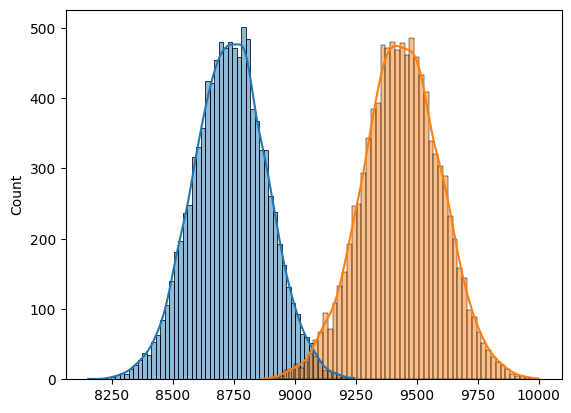

In [ ]:
female_clt2=[]
fem_samp_1000=np.random.choice(female,size=1000)
for i in range(10000):
    female_clt2.append(np.mean(np.random.choice(female,size=1000)))
male_clt2=[]
m_samp_1000=np.random.choice(male,size=1000)
for i in range(10000):
    male_clt2.append(np.mean(np.random.choice(male,size=1000)))
sns.histplot(female_clt2,kde=True)
sns.histplot(male_clt2,kde=True)

In [ ]:
upperlimit_males= np.mean(m_samp_1000) - norm.ppf(0.025) * np.std(m_samp_1000)/(np.sqrt(1000))
lowerlimit_males= np.mean(m_samp_1000) + norm.ppf(0.025)* np.std(m_samp_1000)/(np.sqrt(1000))
upperlimit_females= np.mean(fem_samp_1000) - norm.ppf(0.025) * np.std(fem_samp_1000)/(np.sqrt(1000))
lowerlimit_females= np.mean(fem_samp_1000) + norm.ppf(0.025)* np.std(fem_samp_1000)/(np.sqrt(1000))
print("Confidence Interval by taking 500 customer at 95%")
print("Male:" , lowerlimit_males,upperlimit_males)
print("Female:" , lowerlimit_females,upperlimit_females)

Confidence Interval by taking 500 customer at 95%
Male: 9052.51597909261 9686.640020907389
Female: 8355.464268569045 8962.651731430957


In [ ]:
upperlimit_males= np.mean(m_samp_1000) - norm.ppf(0.05) * np.std(m_samp_1000)/(np.sqrt(1000))
lowerlimit_males= np.mean(m_samp_1000) + norm.ppf(0.05)* np.std(m_samp_1000)/(np.sqrt(1000))
upperlimit_females= np.mean(fem_samp_1000) - norm.ppf(0.05) * np.std(fem_samp_1000)/(np.sqrt(1000))
lowerlimit_females= np.mean(fem_samp_1000) + norm.ppf(0.05)* np.std(fem_samp_1000)/(np.sqrt(1000))
print("Confidence Interval by taking 500 customer at 90%")
print("Male:" , lowerlimit_males,upperlimit_males)
print("Female:" , lowerlimit_females,upperlimit_females)

Confidence Interval by taking 500 customer at 90%
Male: 9103.491164133744 9635.664835866255
Female: 8404.274108967877 8913.841891032125


for 1000 sample means the purchases of male and female are overlapping at 95% confidence interval but after decrease the confidence interval its not overlap

for 1500 sample

<Axes: ylabel='Count'>

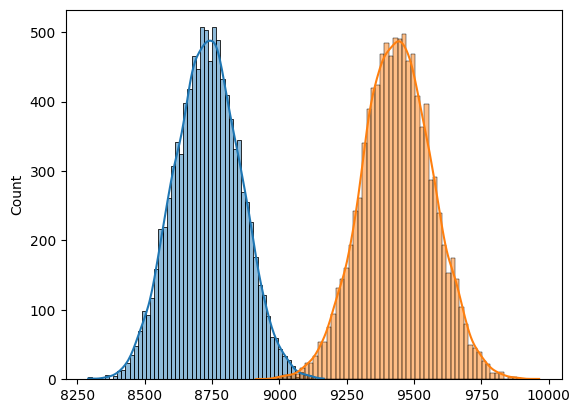

In [ ]:
female_clt3=[]
fem_samp_1500=np.random.choice(female,size=1500)
for i in range(10000):
    female_clt3.append(np.mean(np.random.choice(female,size=1500)))
male_clt3=[]
m_samp_1500=np.random.choice(male,size=1500)
for i in range(10000):
    male_clt3.append(np.mean(np.random.choice(male,size=1500)))
sns.histplot(female_clt3,kde=True)
sns.histplot(male_clt3,kde=True)

In [ ]:
upperlimit_males= np.mean(m_samp_1500) - norm.ppf(0.025) * np.std(m_samp_1500)/(np.sqrt(1500))
lowerlimit_males= np.mean(m_samp_1500) + norm.ppf(0.025)* np.std(m_samp_1500)/(np.sqrt(1500))
upperlimit_females= np.mean(fem_samp_1500) - norm.ppf(0.025) * np.std(fem_samp_1500)/(np.sqrt(1500))
lowerlimit_females= np.mean(fem_samp_1500) + norm.ppf(0.025)* np.std(fem_samp_1500)/(np.sqrt(1500))
print("Confidence Interval by taking 500 customer at 95%")
print("Male:" , lowerlimit_males,upperlimit_males)
print("Female:" , lowerlimit_females,upperlimit_females)

Confidence Interval by taking 500 customer at 95%
Male: 9201.379198756249 9717.390134577085
Female: 8521.037638879261 9007.731694454073


In [ ]:
upperlimit_males= np.mean(m_samp_1500) - norm.ppf(0.005) * np.std(m_samp_1500)/(np.sqrt(1500))
lowerlimit_males= np.mean(m_samp_1500) + norm.ppf(0.005)* np.std(m_samp_1500)/(np.sqrt(1500))
upperlimit_females= np.mean(fem_samp_1500) - norm.ppf(0.005) * np.std(fem_samp_1500)/(np.sqrt(1500))
lowerlimit_females= np.mean(fem_samp_1500) + norm.ppf(0.005)* np.std(fem_samp_1500)/(np.sqrt(1500))
print("Confidence Interval by taking 500 customer at 99%")
print("Male:" , lowerlimit_males,upperlimit_males)
print("Female:" , lowerlimit_females,upperlimit_females)

Confidence Interval by taking 500 customer at 99%
Male: 9120.308005074103 9798.46132825923
Female: 8444.572460906455 9084.196872426879



for 1000 sample the confidence interval of female is (8395.310448934655 9031.392217732013) and for male is (9128.884351650107 9806.47831501656) at 99%

**by T TEST CHECK OUR RESULT**

In [ ]:
H0="There is no difference in average purchasing range of male and female"
Ha="Female has less average purchasing range than male"
Alpha=0.01
T_stat,p_val=ttest_ind(fem_samp_1500,m_samp_1500,alternative="less")
print("t statistics: ", T_stat,"p value: ", p_val)
if p_val>Alpha:
    print(H0)
else:
    print(Ha)

t statistics:  -3.83949715810956 p value:  6.291762133435667e-05
Female has less average purchasing range than male


## **PURCHASE VS MARITAL STATUS**

In [ ]:
married=pd.Series(data.loc[data["Marital_Status"]=="Married"]["Purchase"])
unmarried=pd.Series(data.loc[data["Marital_Status"]=="Unmarried"]["Purchase"])

In [ ]:
np.mean(married)

9261.174574082374

In [ ]:
np.mean(unmarried)

9265.907618921507

for 500 sample

<Axes: ylabel='Count'>

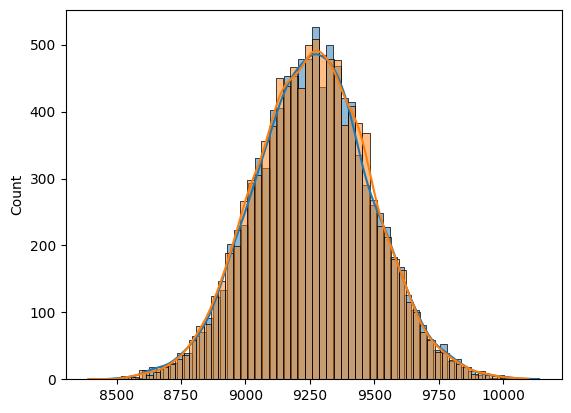

In [ ]:
unma_clt=[]
unma_samp_500=np.random.choice(unmarried,size=500)
for i in range(10000):
    unma_clt.append(np.mean(np.random.choice(unmarried,size=500)))
mar_clt=[]
mar_samp_500=np.random.choice(married,size=500)
for i in range(10000):
    mar_clt.append(np.mean(np.random.choice(married,size=500)))
sns.histplot(unma_clt,kde=True)
sns.histplot(mar_clt,kde=True)

for 1000 sample

<Axes: ylabel='Count'>

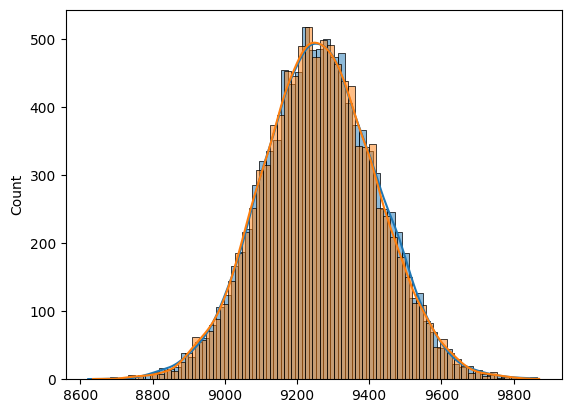

In [ ]:
unma_clt=[]
unma_samp_1000=np.random.choice(unmarried,size=1000)
for i in range(10000):
    unma_clt.append(np.mean(np.random.choice(unmarried,size=1000)))
mar_clt=[]
mar_samp_1000=np.random.choice(married,size=1000)
for i in range(10000):
    mar_clt.append(np.mean(np.random.choice(married,size=1000)))
sns.histplot(unma_clt,kde=True)
sns.histplot(mar_clt,kde=True)

for 10000 sample

<Axes: ylabel='Count'>

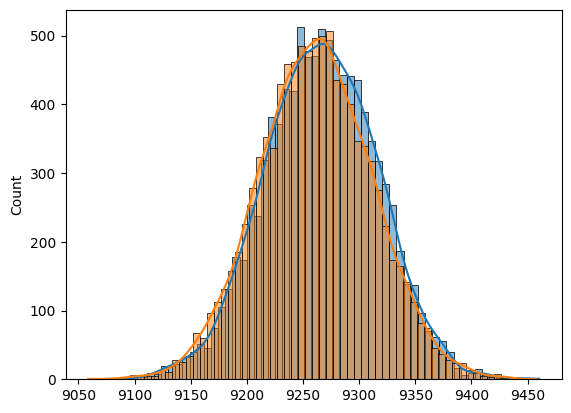

In [ ]:
unma_clt=[]
unma_samp_10000=np.random.choice(unmarried,size=10000)
for i in range(10000):
    unma_clt.append(np.mean(np.random.choice(unmarried,size=10000)))
mar_clt=[]
mar_samp_10000=np.random.choice(married,size=10000)
for i in range(10000):
    mar_clt.append(np.mean(np.random.choice(married,size=10000)))
sns.histplot(unma_clt,kde=True)
sns.histplot(mar_clt,kde=True)

average purchase means of Married and Unmarried are strongly overlapping even after taking 10000 samples.

# **insights**

75% are male and 25% are female in this data

60% of people are from 26 to 45 age group out of them 40% are from 26 to 35 age group which represent the youth

60% of people has occupation less than 7

B city category has highest percentage of share in data 42%

53% of people stay in city for 1 or 2 years

60% are unmarried and 40% are married in this data

Most frequent purchased product category are of 5, 1, and 8 , 74% of product are purchased from these 3 categories

Males average purchasing pattern (9129.0, 9806.5) is greater than females average purchasing pattern (8395.4, 9031.4) at 99% confidence interval.

married average purchasing pattern is almost same as unmarried average purchasing pattern because the pattern is almost overlap even after taking 10000 sample

# **Recommendations**

Around 40% sales are from "26-35" age group, Company can focus on giving offers to other age groups.


75% purchases was done by males, so walmart can focus on statergies to attract more female customer.


males average purchasing is higher compare to females concluded from clt and confidence interval, and 74% of total males sales was from products 1,5,8 Walmart can increase the price of most frequenlty purchased product such as product category 1, 5, and 8